In [112]:
# statistic analysis of airspeck & respeck data (use for report Chapter 3: EDA)
# refer the code of Sharan and Vittorio for ploting distribution

In [115]:
import sys
import pandas as pd
import numpy as np
import statsmodels.api as sm
import os 
from os import listdir
from os.path import isfile, join
import pathlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
from os import path
import matplotlib
import seaborn as sns

In [116]:
def view_missing_value(df):
    for column in list(df.columns):
        print("{}:  {} % missing values \n".format(column, ((len(df) - df[column].count())  / len(df))*100))

In [117]:
subject_list = []
mypath = "../data/DAPHNE/airspeck_AP"
for f in listdir(mypath):
    if isfile(join(mypath, f)):
        if not f.startswith('.'):
            subject_list.append(f)

In [118]:
cols = ['bin0', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8',
        'bin9', 'bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 
        'humidity', 'temperature', 'gpsLongitude', 'gpsLatitude', 'pm2_5']

In [119]:
airspeck_path = path.join(mypath, subject_list[0])
air = pd.read_csv(airspeck_path)[cols]
counts = 1

for i in range(1, len(subject_list)):
    try: 
        airspeck_path = path.join(mypath, subject_list[i])
        air2 = pd.read_csv(airspeck_path)[cols]
        air = pd.concat([air, air2])
        counts += 1
    except:
        continue

In [120]:
air.shape

(95821, 21)

In [121]:
view_missing_value(air)

bin0:  0.0 % missing values 

bin1:  0.0 % missing values 

bin2:  0.0 % missing values 

bin3:  0.0 % missing values 

bin4:  0.0 % missing values 

bin5:  0.0 % missing values 

bin6:  0.0 % missing values 

bin7:  0.0 % missing values 

bin8:  0.0 % missing values 

bin9:  0.0 % missing values 

bin10:  0.0 % missing values 

bin11:  0.0 % missing values 

bin12:  0.0 % missing values 

bin13:  0.0 % missing values 

bin14:  0.0 % missing values 

bin15:  0.0 % missing values 

humidity:  0.40492167687667635 % missing values 

temperature:  0.0 % missing values 

gpsLongitude:  0.0 % missing values 

gpsLatitude:  0.0 % missing values 

pm2_5:  0.03861366506298202 % missing values 



/Users/apple/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


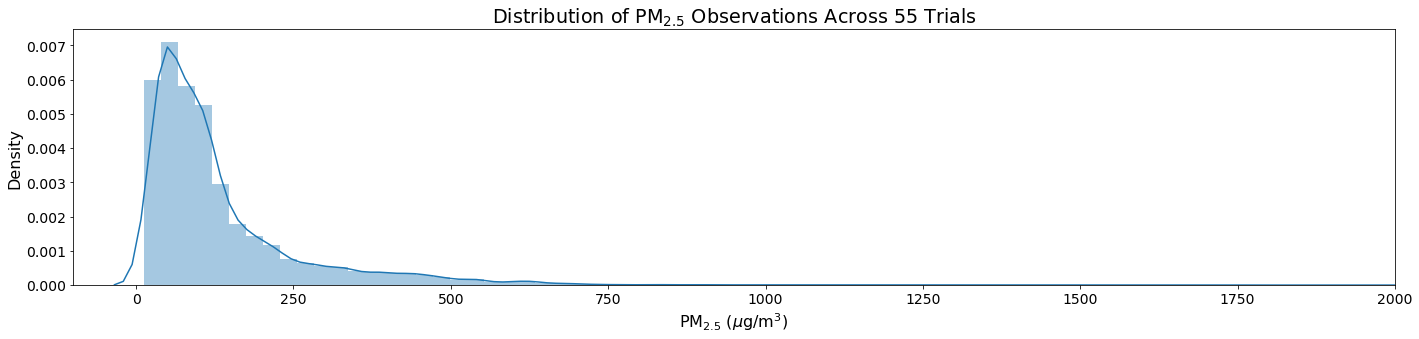

In [95]:
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
matplotlib.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(1, 1, figsize=(20,5))
ax = sns.distplot(air[["pm2_5"]], bins=100)
ax.set_xlim([-100, 2000])
ax.set_xlabel("PM$_{2.5}$ ($\mu$g/m$^3$)")
ax.set_title("Distribution of PM$_{2.5}$ Observations Across 55 Trials")
plt.tight_layout()
plt.savefig("pm_dist.pdf")
plt.show()

In [52]:
air['pm2_5']

0       80.523940
1       81.132229
2       81.911600
3       81.290966
4       80.469122
          ...    
881    115.607050
882    114.076404
883    116.887169
884    125.080541
885    125.898699
Name: pm2_5, Length: 95821, dtype: float64

In [59]:
np.mean(air['pm2_5'].dropna().values)

137.160942020347

In [96]:
np.median(air['pm2_5'].dropna().values)

92.26431401591387

In [89]:
min(air['pm2_5'].dropna().values)

13.235834742854935

In [97]:
max(air['pm2_5'].dropna().values)

2709.229666210025

In [104]:
# respeck

In [98]:
subject_list = []
mypath = "../data/DAPHNE/respeck_AP"
for f in listdir(mypath):
    if isfile(join(mypath, f)):
        if not f.startswith('.'):
            subject_list.append(f)

In [102]:
cols = ['x', 'y', 'z']

In [103]:
airspeck_path = path.join(mypath, subject_list[0])
air = pd.read_csv(airspeck_path)[cols]
counts = 1

for i in range(1, len(subject_list)):
    try: 
        airspeck_path = path.join(mypath, subject_list[i])
        air2 = pd.read_csv(airspeck_path)[cols]
        air = pd.concat([air, air2])
        counts += 1
    except:
        continue

In [106]:
air.shape

(94961644, 3)

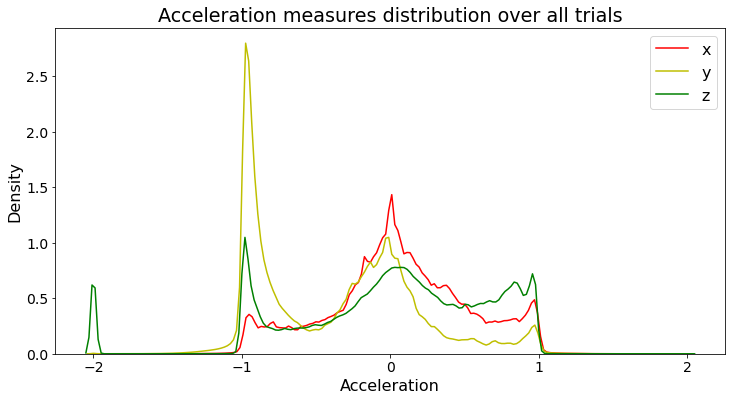

In [107]:
fig, ax = plt.subplots(figsize=(12, 6))
fig = sns.kdeplot(air['x'], color='r', label="x")
fig = sns.kdeplot(air['y'], color='y', label="y")
fig = sns.kdeplot(air['z'], color='g', label="z")
ax.set_title("Acceleration measures distribution over all trials")
ax.set_xlabel("Acceleration")
plt.legend()
plt.savefig("raw_respeck_kde.pdf")
plt.show()

In [108]:
view_missing_value(air)

x:  0.0 % missing values 

y:  0.0 % missing values 

z:  0.0 % missing values 



In [109]:
np.mean(air['x'].dropna().values)

0.05323500710515934

In [110]:
np.mean(air['y'].dropna().values)

-0.36769309477830503

In [111]:
np.mean(air['z'].dropna().values)

0.008495651975392364